[-4. 10.]
[-2.79875 10.15   ]
[-3.12203528 10.09207504]
[-3.17485531 10.08345077]
[-3.17440601 10.08335716]
[-3.17417911 10.08010535]
[-3.17388028 10.07998804]
[-3.16732016 10.01526791]
[-3.16364168 10.01568413]
[-3.16371682 10.01550775]
[-2.94002395  8.73477669]
[-2.95242133  8.73250079]
[-2.95375222  8.73210807]
[-2.95386492  8.73192167]
[-2.95360198  8.72861983]
[-2.95333059  8.72849845]
[-2.9522788   8.72533002]
[-2.95267533  8.72509552]
[-2.95300163  8.72169357]
[-2.95223116  8.7216567 ]
[-2.95212698  8.721507  ]
[-2.93793273  8.65697413]
[-2.94069784  8.656336  ]
[-2.9409819   8.65612019]
[-2.94111581  8.65274737]
[-2.94051069  8.65268274]
[-2.94041942  8.65253075]
[-2.92653665  8.58788706]
[-2.92896008  8.5873053 ]
[-2.92922238  8.58709284]
[-2.92934591  8.58371829]
[-2.92875183  8.58365202]
[-2.92865775  8.5835004 ]
[-2.91442034  8.51885844]
[-2.91708658  8.51823313]
[-2.91739652  8.51801215]
[-2.91767617  8.51460729]
[2.84839015 8.15999528]
[2.8545746  8.15882856]
[2.85557142 

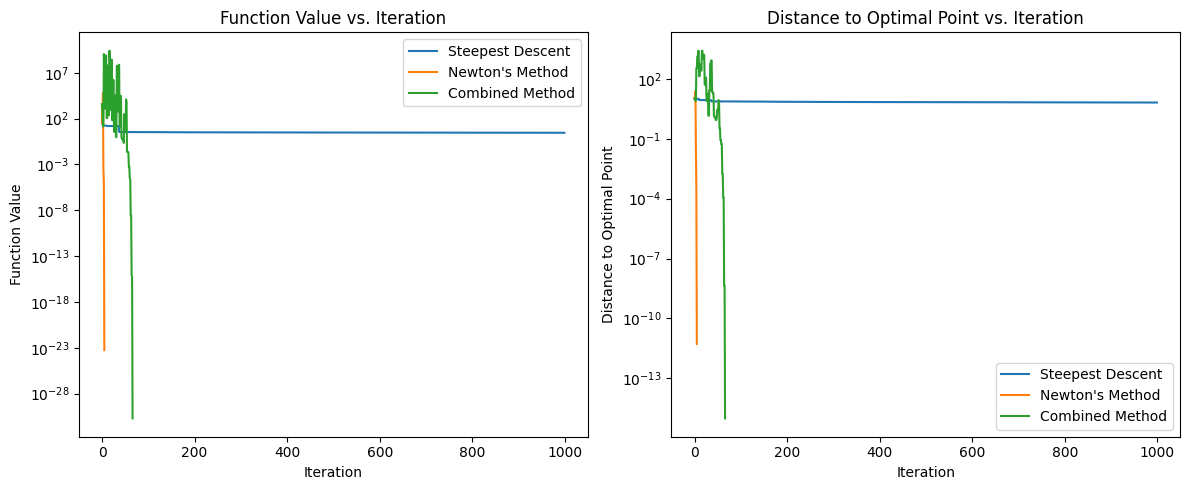

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

def grad_f(x):
    df_dx1 = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
    df_dx2 = 200 * (x[1] - x[0]**2)
    return np.array([df_dx1, df_dx2])

def hessian_f(x):
    d2f_dx1dx1 = 1200 * x[0]**2 - 400 * x[1] + 2
    d2f_dx1dx2 = -400 * x[0]
    d2f_dx2dx1 = -400 * x[0]
    d2f_dx2dx2 = 200
    return np.array([[d2f_dx1dx1, d2f_dx1dx2],
                     [d2f_dx2dx1, d2f_dx2dx2]])

def backtracking_line_search(x, grad, alpha=1, rho=0.05, c=1e-4):
    while f(x - alpha * grad) > f(x) - c * alpha * np.dot(grad, grad):
        alpha *= rho
    return alpha

def steepest_descent(x0, tol=1e-10, max_iter=1000):
    x = x0.copy()

    history_f = []
    history_dist = []
    x_star = np.array([1, 1])

    for i in range(max_iter):
        grad = grad_f(x)
        f_val = f(x)
        print(x)
        distance = np.linalg.norm(x - x_star)
        history_f.append(f_val)
        history_dist.append(distance)
        if np.linalg.norm(grad) < tol:
            break
        alpha = backtracking_line_search(x, grad)
        x = x - alpha * grad
    return history_f, history_dist

def newton_method(x0, tol=1e-6, max_iter=100):
    x = x0.copy()
    history_f = []
    history_dist = []
    x_star = np.array([1, 1])
    for i in range(max_iter):
        grad = grad_f(x)
        hess = hessian_f(x)

        f_val = f(x)
        distance = np.linalg.norm(x - x_star)
        history_f.append(f_val)
        history_dist.append(distance)
        if np.linalg.norm(grad) < tol:
            break
        try:
            delta = np.linalg.solve(hess, grad)
        except np.linalg.LinAlgError:
            print("Hessian is singular at iteration", i)
            break
        x = x - delta
    return history_f, history_dist

def combined_method(x0, tol=1e-6, max_iter=100):
    x = x0.copy()
    history_f = []
    history_dist = []
    x_star = np.array([1, 1])

    for i in range(max_iter):
        grad = grad_f(x)
        f_val = f(x)
        distance = np.linalg.norm(x - x_star)
        history_f.append(f_val)
        history_dist.append(distance)
        if np.linalg.norm(grad) < tol:
            break

        if i % 2 == 0: 
            alpha = backtracking_line_search(x, grad)
            x = x - alpha * grad
        else:  
            hess = hessian_f(x)
            try:
                delta = np.linalg.solve(hess, grad)
            except np.linalg.LinAlgError:
                print("Hessian is singular at iteration", i)
                break
            x = x - delta

    return history_f, history_dist

x0 = np.array([-4.0, 10.0])

sd_f, sd_dist = steepest_descent(x0)
newton_f, newton_dist = newton_method(x0)
combined_f, combined_dist = combined_method(x0)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(sd_f, label='Steepest Descent')
plt.plot(newton_f, label="Newton's Method")
plt.plot(combined_f, label='Combined Method')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title('Function Value vs. Iteration')
plt.legend()
plt.yscale('log')

plt.subplot(1, 2, 2)
plt.plot(sd_dist, label='Steepest Descent')
plt.plot(newton_dist, label="Newton's Method")
plt.plot(combined_dist, label='Combined Method')
plt.xlabel('Iteration')
plt.ylabel('Distance to Optimal Point')
plt.title('Distance to Optimal Point vs. Iteration')
plt.legend()
plt.yscale('log')

plt.tight_layout()
plt.show()